In [137]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm


movie_df = pd.read_csv('output/Final_Data.csv')
movie_df.head()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13


In [138]:
movie_df['ROI'] = (movie_df['Domestic_Gross']/ movie_df['Budget']) *100

movie_df.head()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R,330.588556
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13,55.912833
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,18.680920
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R,40.057897
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13,634.655220


In [139]:
movie_df.count()

Title             2371
Budget            2371
Domestic_Gross    2371
Year              2371
Crit_Rating       2371
Aud_Rating        2370
Runtime_Min       2336
Genre             2371
MPAA_Rating       2371
ROI               2371
dtype: int64

In [140]:
gb = movie_df.groupby(['Year',"Aud_Rating","Crit_Rating"]).size()
count = pd.DataFrame(gb).reset_index()
count.rename(columns = {0:'Count'}, inplace = True)
count

#movie_df['Year'].value_counts()

,Year,Aud_Rating,Crit_Rating,Count
0,1999,15.0,17,1
1,1999,18.0,21,1
2,1999,21.0,10,1
3,1999,24.0,2,1
4,1999,24.0,5,1
...,...,...,...,...
2334,2018,88.0,92,1
2335,2018,91.0,61,1
2336,2018,91.0,78,1
2337,2018,91.0,85,1


In [141]:
movie_gb = movie_df.groupby(["Aud_Rating"])['ROI'].mean()
print(movie_gb)

avg_roi_df = pd.DataFrame(movie_gb).reset_index()
avg_roi_df

Aud_Rating
10.0    145.705057
12.0     26.839606
14.0     27.129346
15.0    156.241400
16.0     17.018422
           ...    
92.0    270.102774
93.0    289.166518
94.0    232.392510
95.0    278.948407
96.0    179.280919
Name: ROI, Length: 85, dtype: float64


,Aud_Rating,ROI
0,10.0,145.705057
1,12.0,26.839606
2,14.0,27.129346
3,15.0,156.241400
4,16.0,17.018422
...,...,...
80,92.0,270.102774
81,93.0,289.166518
82,94.0,232.392510
83,95.0,278.948407


In [142]:
Run_Bins =  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Run_Names = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]
movie_df["Aud_Rating"] = pd.cut(movie_df["Aud_Rating"], Run_Bins, labels=Run_Names)
movie_df["ROI"] =(movie_df["Domestic_Gross"]/movie_df["Budget"]) *100
movie_df["ROI"] = movie_df["ROI"].round()
Run_Groups = movie_df.groupby("Aud_Rating")
Run_Counter = Run_Groups["Title"].nunique()

Run_Grouping = pd.DataFrame(movie_df)
Run_Grouping= Run_Grouping.dropna()
Run_Grouping["ROI"] = Run_Grouping["ROI"].astype("float")
Run_Grouping

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI
0,VARSITY BLUES,16000000,52894169,1999,41,71-80,104.0,Drama,R,331.0
1,AT FIRST SIGHT,40000000,22365133,1999,32,41-50,128.0,"Drama, Romance",PG-13,56.0
2,VIRUS,75000000,14010690,1999,10,21-30,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,19.0
3,IN DREAMS,30000000,12017369,1999,24,31-40,120.0,"Horror, Mystery & Suspense",R,40.0
4,SHES ALL THAT,10000000,63465522,1999,40,51-60,95.0,"Comedy, Drama, Romance",PG-13,635.0
...,...,...,...,...,...,...,...,...,...,...
2366,BUMBLEBEE,102000000,127195589,2018,92,71-80,119.0,"Action & Adventure, Science Fiction & Fantasy",PG-13,125.0
2367,THE MULE,50000000,103804407,2018,70,61-70,116.0,"Drama, Mystery & Suspense",R,208.0
2368,HOLMES & WATSON,42000000,30568743,2018,11,21-30,89.0,"Action & Adventure, Comedy, Mystery & Suspense",PG-13,73.0
2369,VICE,60000000,47836282,2018,66,51-60,132.0,Drama,R,80.0


In [143]:
Run_Plot = Run_Grouping.groupby("Aud_Rating")
histo = Run_Plot.apply(lambda x: x.mean())
histo.reset_index(level=0, inplace=True)
histo

,Aud_Rating,Budget,Domestic_Gross,Year,Crit_Rating,Runtime_Min,ROI
0,0-10,7.000000e+06,1.019935e+07,2003.000000,3.000000,90.000000,146.000000
1,11-20,4.222917e+07,2.201070e+07,2005.125000,11.958333,96.333333,104.666667
2,21-30,4.517355e+07,3.590254e+07,2006.942149,19.264463,97.115702,362.462810
3,31-40,4.428784e+07,3.856904e+07,2008.094118,26.305882,99.733333,176.058824
4,41-50,5.354555e+07,5.867918e+07,2008.560647,36.043127,104.708895,146.687332
5,51-60,5.700577e+07,7.021658e+07,2008.498795,44.081928,105.812048,305.093976
6,61-70,5.390823e+07,7.493587e+07,2008.314433,54.876289,109.453608,186.750000
7,71-80,5.432211e+07,8.841604e+07,2008.360000,67.605333,113.040000,346.456000
8,81-90,5.748253e+07,1.137398e+08,2008.524096,78.433735,119.466867,349.641566
9,91-100,7.454717e+07,1.466298e+08,2008.283019,83.773585,127.018868,278.396226


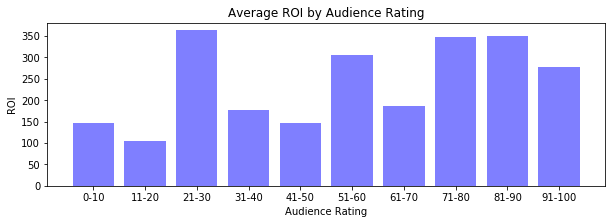

In [144]:
plt.figure(figsize=(10, 3))
plt.bar(histo['Aud_Rating'], histo['ROI'], color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]

plt.title("Average ROI by Audience Rating")
plt.xlabel("Audience Rating")
plt.ylabel("ROI")
plt.savefig("Images/AudRating.png")

In [145]:
Run_Bins =  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Run_Names = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]
movie_df["Crit_Rating"] = pd.cut(movie_df["Crit_Rating"], Run_Bins, labels=Run_Names)
movie_df["ROI"] =(movie_df["Domestic_Gross"]/movie_df["Budget"]) *100
movie_df["ROI"] = movie_df["ROI"].round()
Run_Groups = movie_df.groupby("Aud_Rating")
Run_Counter = Run_Groups["Title"].nunique()

Run_Grouping = pd.DataFrame(movie_df)
Run_Grouping= Run_Grouping.dropna()
Run_Grouping["ROI"] = Run_Grouping["ROI"].astype("float")
Run_Grouping

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI
0,VARSITY BLUES,16000000,52894169,1999,41-50,71-80,104.0,Drama,R,331.0
1,AT FIRST SIGHT,40000000,22365133,1999,31-40,41-50,128.0,"Drama, Romance",PG-13,56.0
2,VIRUS,75000000,14010690,1999,0-10,21-30,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,19.0
3,IN DREAMS,30000000,12017369,1999,21-30,31-40,120.0,"Horror, Mystery & Suspense",R,40.0
4,SHES ALL THAT,10000000,63465522,1999,31-40,51-60,95.0,"Comedy, Drama, Romance",PG-13,635.0
...,...,...,...,...,...,...,...,...,...,...
2366,BUMBLEBEE,102000000,127195589,2018,91-100,71-80,119.0,"Action & Adventure, Science Fiction & Fantasy",PG-13,125.0
2367,THE MULE,50000000,103804407,2018,61-70,61-70,116.0,"Drama, Mystery & Suspense",R,208.0
2368,HOLMES & WATSON,42000000,30568743,2018,11-20,21-30,89.0,"Action & Adventure, Comedy, Mystery & Suspense",PG-13,73.0
2369,VICE,60000000,47836282,2018,61-70,51-60,132.0,Drama,R,80.0


In [146]:
Run_Plot = Run_Grouping.groupby("Crit_Rating")
histo = Run_Plot.apply(lambda x: x.mean())
histo.reset_index(level=0, inplace=True)
histo

,Crit_Rating,Budget,Domestic_Gross,Year,Runtime_Min,ROI
0,0-10,3.335263e+07,3.268166e+07,2007.248120,97.240602,189.105263
1,11-20,4.479716e+07,4.453384e+07,2007.952381,100.479853,287.717949
2,21-30,5.044698e+07,5.669328e+07,2007.590747,104.345196,169.597865
3,31-40,5.678528e+07,5.958740e+07,2007.868644,107.516949,207.898305
4,41-50,5.783417e+07,7.165695e+07,2008.025000,108.825000,181.087500
5,51-60,5.635607e+07,7.479078e+07,2008.012552,110.213389,178.263598
6,61-70,5.260000e+07,7.209261e+07,2008.172840,110.864198,221.296296
7,71-80,6.079373e+07,9.397593e+07,2008.593023,114.562016,301.170543
8,81-90,5.885923e+07,1.085680e+08,2009.209486,114.545455,438.343874
9,91-100,5.991682e+07,1.280093e+08,2010.465909,115.528409,435.221591


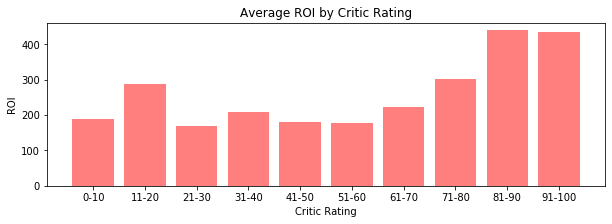

In [147]:
plt.figure(figsize=(10, 3))
plt.bar(histo['Crit_Rating'], histo['ROI'], color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]

plt.title("Average ROI by Critic Rating")
plt.xlabel("Critic Rating")
plt.ylabel("ROI")
plt.savefig("Images/CriticRating.png")